
=== Plotting: A ===


/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_24594/4131411848.py:59: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'bool'):


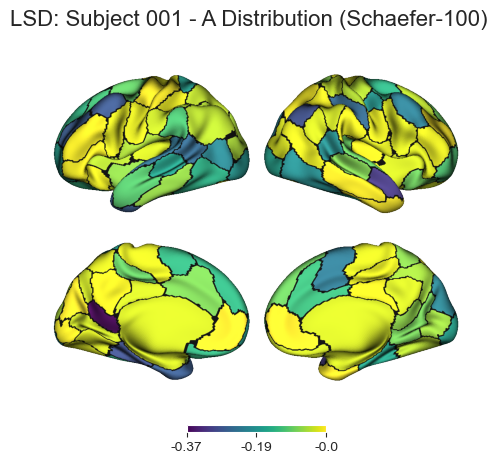


=== Plotting: varphi ===


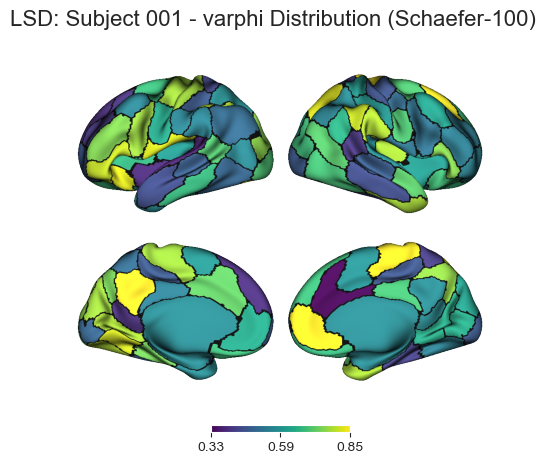


=== Plotting: phi ===


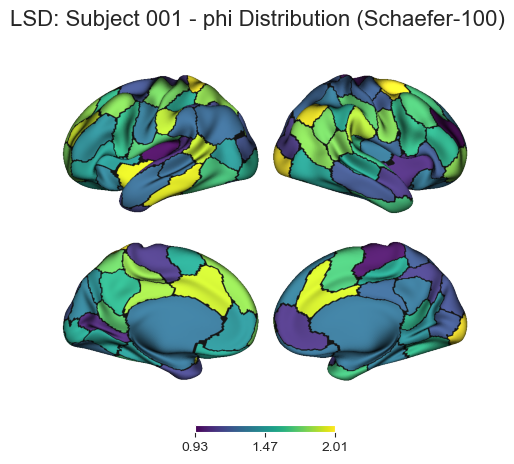


=== Plotting: chi ===


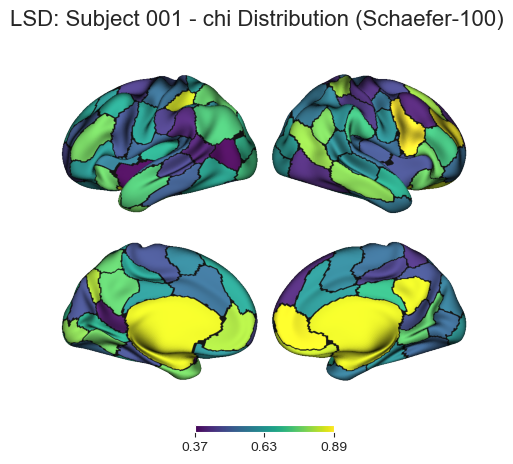


=== Plotting: mtt ===


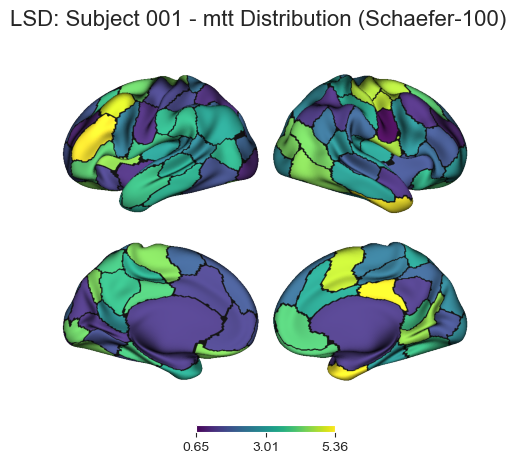


=== Plotting: tau ===


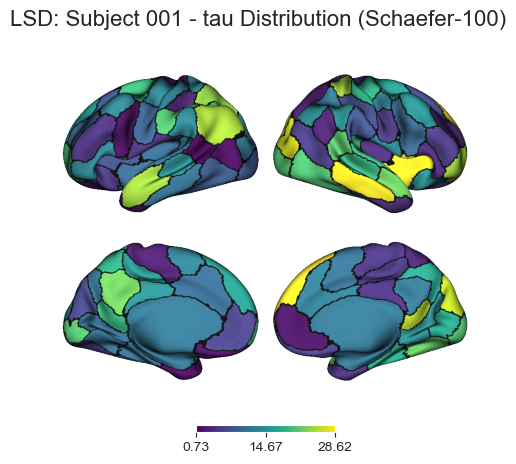


=== Plotting: alpha_v ===


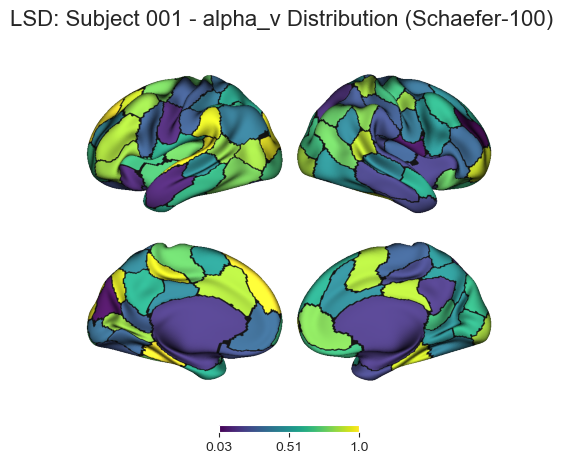


=== Plotting: beta_v ===


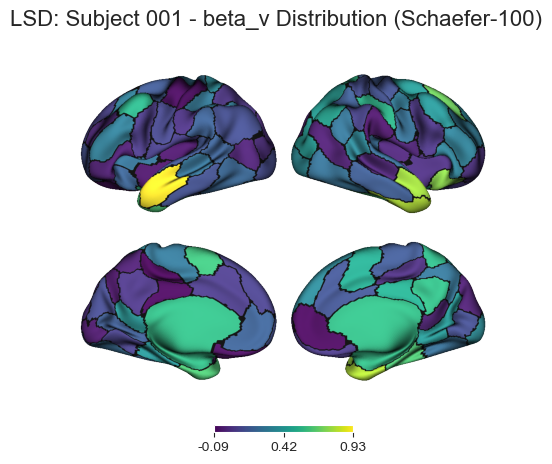


=== Plotting: alpha_e ===


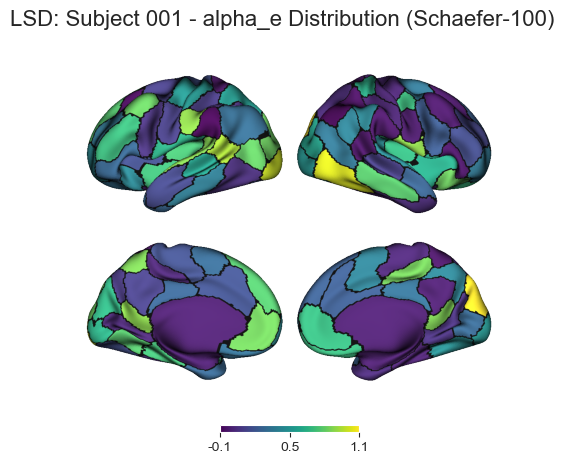


=== Plotting: beta_e ===


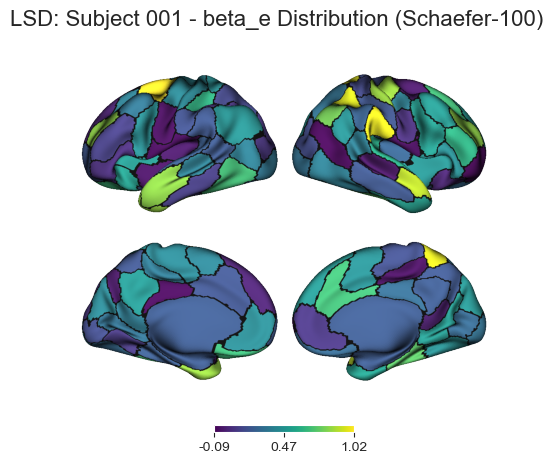


=== Plotting: alpha ===


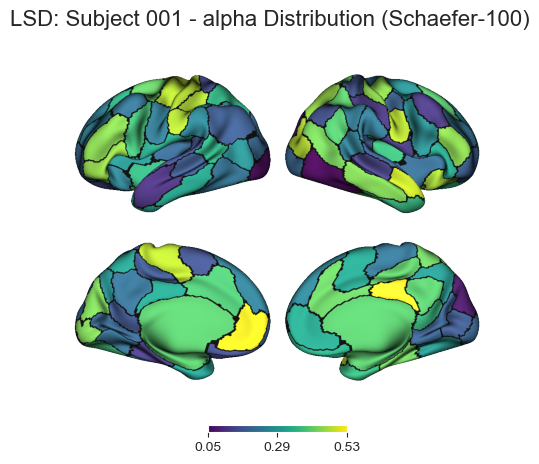


=== Plotting: E0 ===


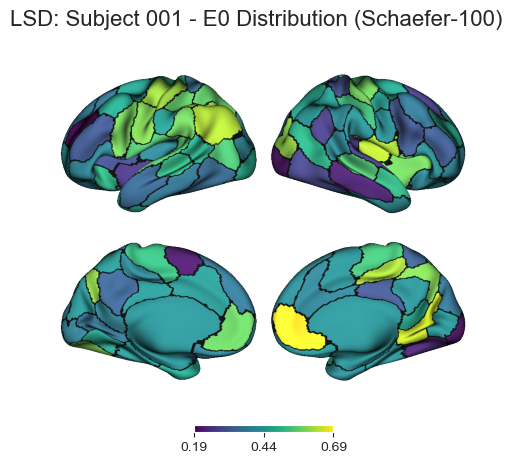

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from neuromaps.datasets import fetch_fslr
from brainspace.datasets import load_parcellation
from surfplot import Plot

subject_id = 1
exp = "PLCB"
n_rois = 100  # Schaefer-100
padded_id = f"{subject_id:03d}"
base_dir = "/Users/xuenbei/Desktop/finalyearproject/spDCM/fitted_data"
subject_dir = os.path.join(base_dir, f"sub-{padded_id}")
output_dir = os.path.join(base_dir, "spdcm_surfplot", f"sub-{padded_id}")
os.makedirs(output_dir, exist_ok=True)

# Load surface and parcellation once
surfaces = fetch_fslr()
lh_surf, rh_surf = surfaces["inflated"]
lh_parc, rh_parc = load_parcellation("schaefer", scale=100)

# Get parameter names from a file
example_file = os.path.join(subject_dir, f"roi-0-{exp}_results.json")
with open(example_file, 'r') as f:
    example_data = json.load(f)
param_names = list(example_data["final_parameters"].keys())

# Loop over all parameters
for parameter in param_names:
    param_values = np.full(n_rois, np.nan)

    # Load values per ROI
    for roi_index in range(n_rois):
        file_name = f"roi-{roi_index}-{exp}_results.json"
        file_path = os.path.join(subject_dir, file_name)
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                data = json.load(f)
                value = data.get("final_parameters", {}).get(parameter, None)

                # For complex matrix A
                if parameter == "A" and isinstance(value, list):
                    try:
                        value = float(value[0][0][0])  # real part of A[0][0]
                    except (IndexError, TypeError, ValueError):
                        print(f"Failed to parse real(A) in {file_name}")
                        value = None

                if value is not None:
                    param_values[roi_index] = value
                else:
                    print(f"'{parameter}' missing or invalid in {file_name}")
        else:
            print(f" Missing file: {file_name}")
    if not hasattr(np, 'bool'):
        np.bool = bool
        
    # Map values to brain vertices
    lh_data = np.zeros_like(lh_parc, dtype=float)
    rh_data = np.zeros_like(rh_parc, dtype=float)

    for label in np.unique(lh_parc):
        index = label - 1
        if index < len(param_values):
            lh_data[lh_parc == label] = param_values[index]

    for label in np.unique(rh_parc):
        index = label - 1
        if index < len(param_values):
            rh_data[rh_parc == label] = param_values[index]

    p = Plot(lh_surf, rh_surf, views=["lateral", "medial"])
    p.add_layer({"left": lh_data, "right": rh_data}, cmap="viridis", cbar=True)
    p.add_layer({"left": lh_parc, "right": rh_parc}, cmap="gray", as_outline=True, cbar=False)
    fig = p.build()
    fig.suptitle(f"{exp}: Subject {padded_id} - {parameter} Distribution (Schaefer-100)", fontsize=16)
    fig.savefig(os.path.join(output_dir, f"sub-{padded_id}_{exp}_{parameter}_plot.png"), dpi=300)
    plt.show()




=== Plotting: A ===

=== Plotting: varphi ===

=== Plotting: phi ===

=== Plotting: chi ===

=== Plotting: mtt ===

=== Plotting: tau ===

=== Plotting: alpha_v ===

=== Plotting: beta_v ===

=== Plotting: alpha_e ===

=== Plotting: beta_e ===

=== Plotting: alpha ===

=== Plotting: E0 ===


Context leak detected, msgtracer returned -1
/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_24594/3794684565.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


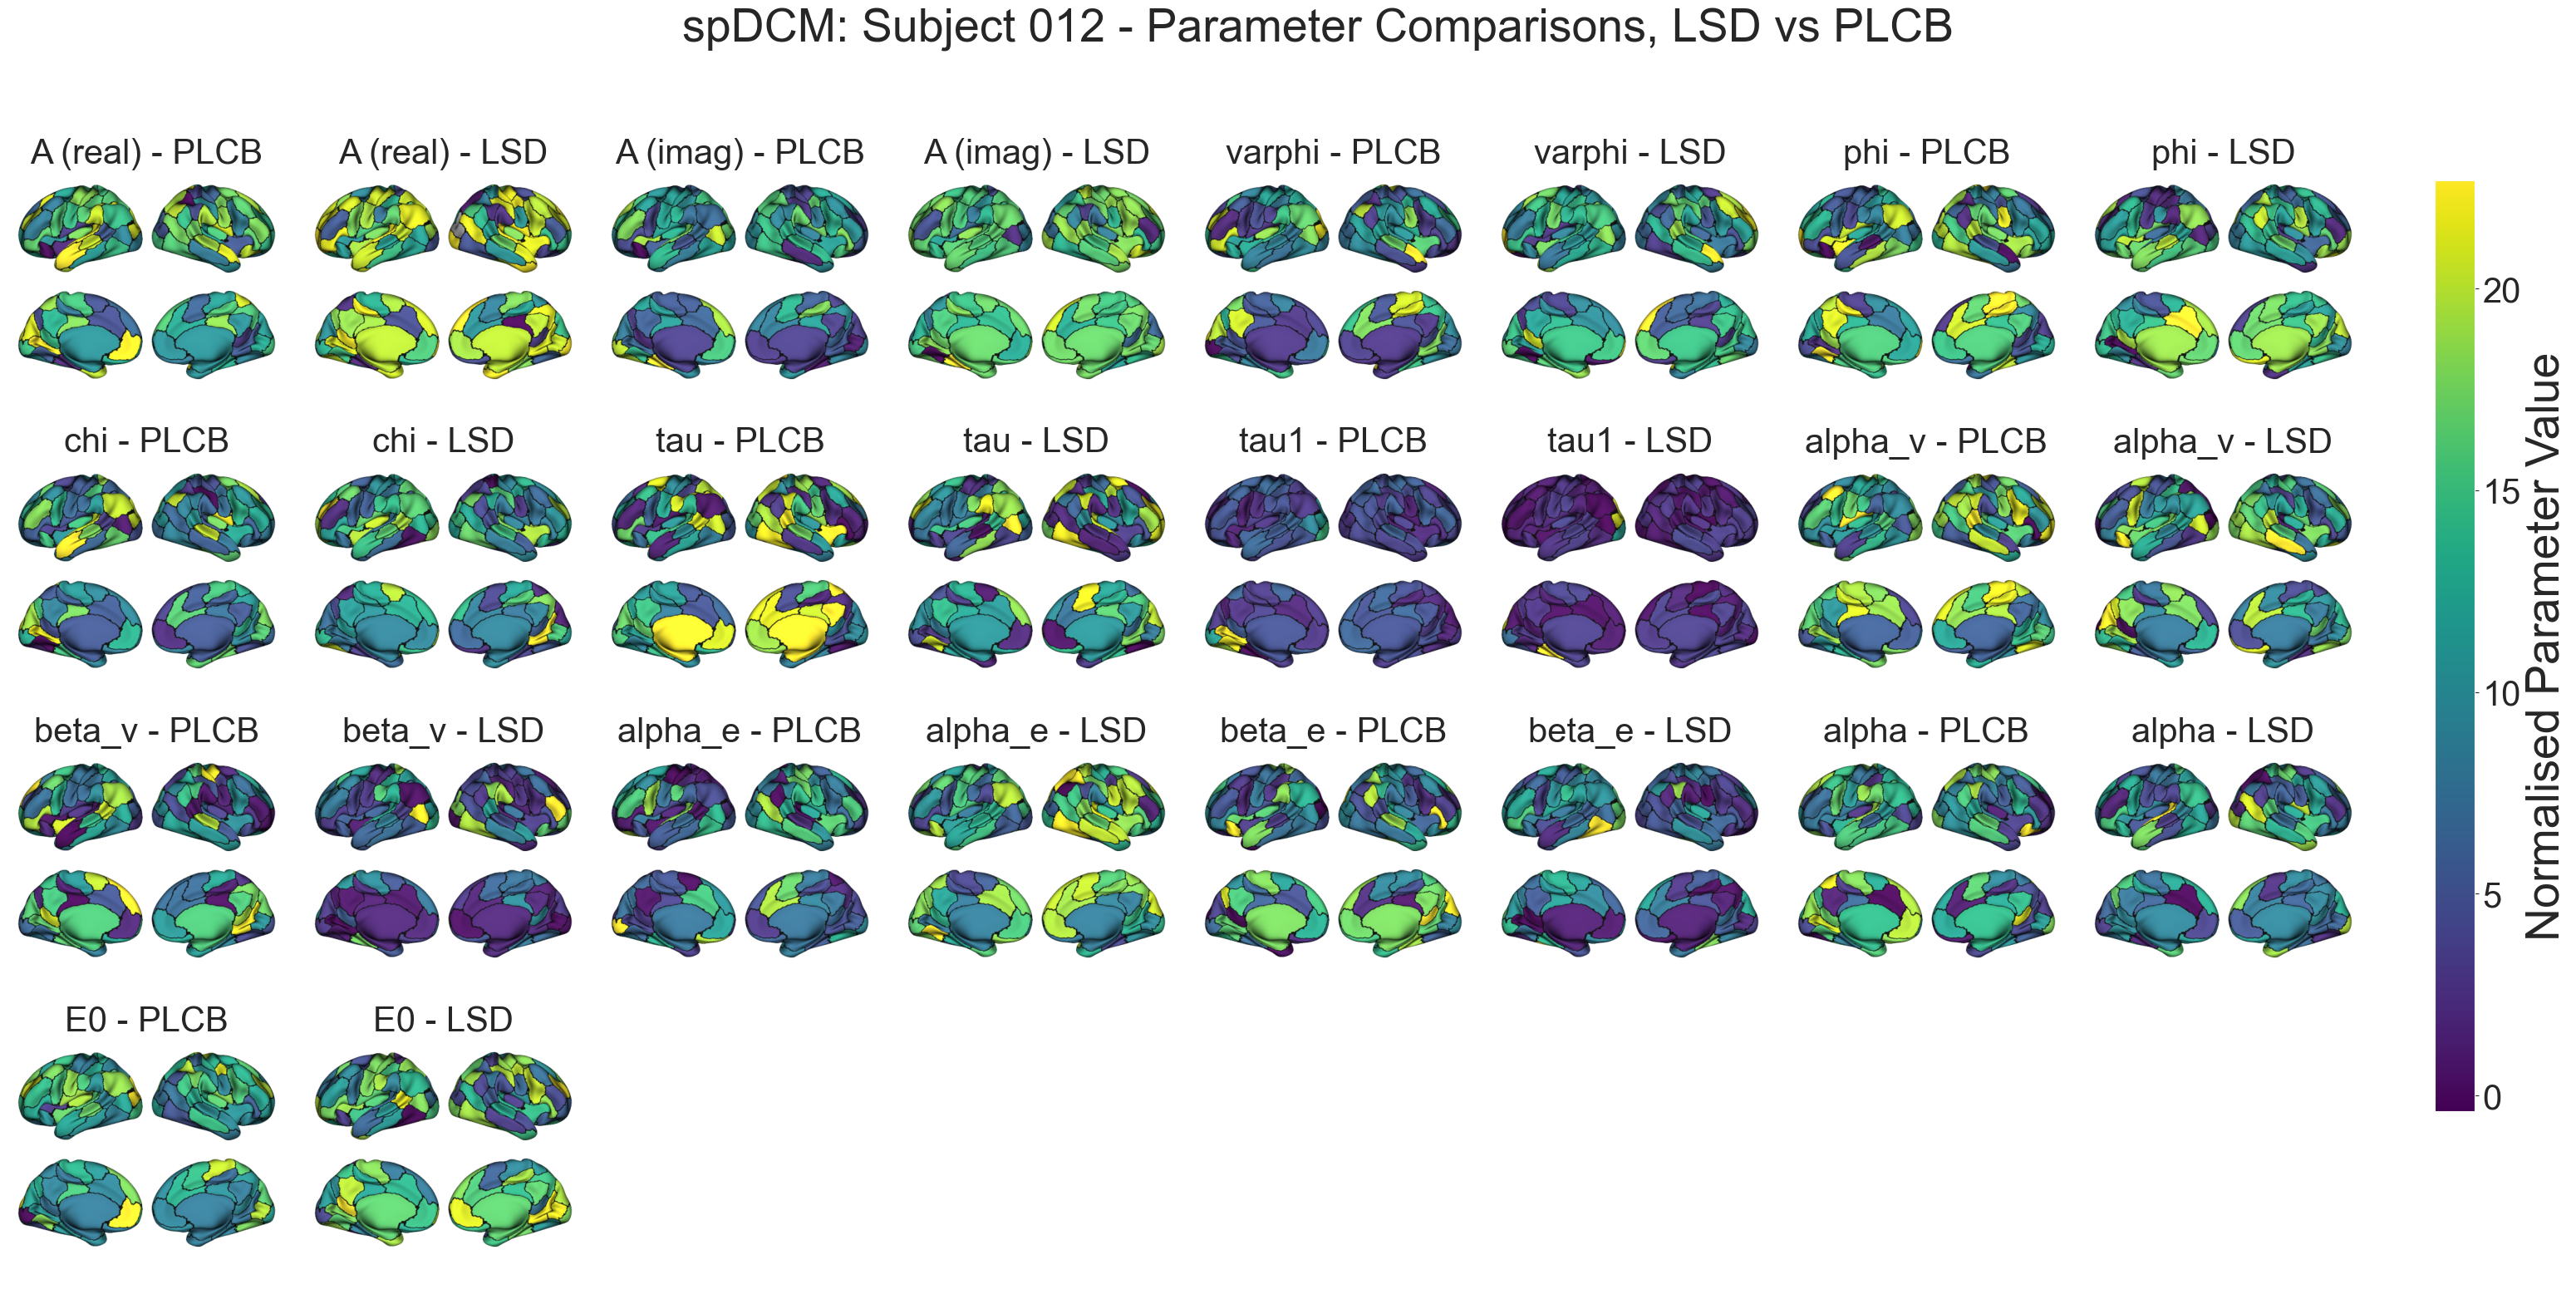

In [ ]:
import io
import os
import math
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from neuromaps.datasets import fetch_fslr
from brainspace.datasets import load_parcellation
from surfplot import Plot

subject_id = 12
n_rois = 100  # Schaefer-100
padded_id = f"{subject_id:03d}"
base_dir = "/Users/xuenbei/Desktop/finalyearproject/spDCM/tuning_all_params/trial_data"
subject_dir = os.path.join(base_dir, f"sub-{padded_id}")
output_dir = os.path.join(base_dir, "spdcm_surfplot", f"sub-{padded_id}")
os.makedirs(output_dir, exist_ok=True)

# Load surface and parcellation once
surfaces = fetch_fslr()
lh_surf, rh_surf = surfaces["inflated"]
lh_parc, rh_parc = load_parcellation("schaefer", scale=100)

example_file = os.path.join(subject_dir, f"roi-0-{exp}_results.json")
with open(example_file, 'r') as f:
    example_data = json.load(f)
param_names = list(example_data["final_parameters"].keys())

# Loop over all parameters
for parameter in param_names:
    print(f"\nPlotting: {parameter}")
    param_values = np.full(n_rois, np.nan)

    # Load values per ROI
    for roi_index in range(n_rois):
        file_name = f"roi-{roi_index}-{exp}_results.json"
        file_path = os.path.join(subject_dir, file_name)
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                data = json.load(f)
                value = data.get("final_parameters", {}).get(parameter, None)

                # Special case for complex matrix A
                if parameter == "A" and isinstance(value, list):
                    try:
                        value = float(value[0][0][0])  # real part of A[0][0]
                    except (IndexError, TypeError, ValueError):
                        print(f"Failed to parse real(A) in {file_name}")
                        value = None

                if value is not None:
                    param_values[roi_index] = value
                else:
                    print(f"'{parameter}' missing or invalid in {file_name}")
        else:
            print(f" Missing file: {file_name}")
    if not hasattr(np, 'bool'):
        np.bool = bool
        
    # Map values to brain vertices
    lh_data = np.zeros_like(lh_parc, dtype=float)
    rh_data = np.zeros_like(rh_parc, dtype=float)

    for label in np.unique(lh_parc):
        index = label - 1
        if index < len(param_values):
            lh_data[lh_parc == label] = param_values[index]

    for label in np.unique(rh_parc):
        index = label - 1
        if index < len(param_values):
            rh_data[rh_parc == label] = param_values[index]

conditions = ["PLCB", "LSD"]
n_conditions = len(conditions)
param_name_map = {
    "mtt": "tau",
    "tau": "tau1",
    "lamb": "lambda",
    "A_real": "A (real)",
    "A_imag": "A (imag)"
}

# === Parameters to plot ===
param_names = [
    "A_real", "A_imag", "varphi", "phi", "chi", "mtt", "tau",
    "alpha_v", "beta_v", "alpha_e", "beta_e", "alpha", "E0"
]

n_params = len(param_names)
n_rows = 4
n_per_row = math.ceil(n_params / n_rows)
n_cols = n_per_row * n_conditions

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.reshape(n_rows, n_cols)

all_param_values = []

for parameter in param_names:
    for exp in conditions:
        param_values = np.full(n_rois, np.nan)
        subject_dir = os.path.join(base_dir, f"sub-{padded_id}")
        for roi_index in range(n_rois):
            file_name = f"roi-{roi_index}-{exp}_results.json"
            file_path = os.path.join(subject_dir, file_name)
            if os.path.exists(file_path):
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    value = data.get("final_parameters", {}).get("A" if "A_" in parameter else parameter, None)
                    if value is not None:
                        if parameter == "A_real":
                            try:
                                real, _ = value[0][0]
                                param_values[roi_index] = real
                            except Exception as e:
                                print(f"Warning: ROI {roi_index} A_real parsing error: {value} ({e})")
                        elif parameter == "A_imag":
                            try:
                                _, imag = value[0][0]
                                param_values[roi_index] = imag
                            except Exception as e:
                                print(f"Warning: ROI {roi_index} A_imag parsing error: {value} ({e})")
                        elif isinstance(value, (list, np.ndarray)):
                            try:
                                scalar = float(np.array(value).flatten()[0])
                                param_values[roi_index] = scalar
                            except Exception as e:
                                print(f"Warning: ROI {roi_index}, {parameter} list format issue: {value} ({e})")
                        elif isinstance(value, (int, float)):
                            param_values[roi_index] = value
        all_param_values.append(param_values)

# Normalise globally
all_param_values = np.concatenate(all_param_values)
vmin_global = np.nanmin(all_param_values)
vmax_global = np.nanmax(all_param_values)

# Second pass to plot 
for p_idx, parameter in enumerate(param_names):
    row = p_idx // n_per_row
    col_start = (p_idx % n_per_row) * 2

    for c_idx, exp in enumerate(conditions):
        col = col_start + c_idx
        param_values = np.full(n_rois, np.nan)
        subject_dir = os.path.join(base_dir, f"sub-{padded_id}")

        for roi_index in range(n_rois):
            file_name = f"roi-{roi_index}-{exp}_results.json"
            file_path = os.path.join(subject_dir, file_name)
            if os.path.exists(file_path):
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    value = data.get("final_parameters", {}).get("A" if "A_" in parameter else parameter, None)
                    if value is not None:
                        if parameter == "A_real":
                            try:
                                real, _ = value[0][0]
                                param_values[roi_index] = real
                            except:
                                param_values[roi_index] = np.nan
                        elif parameter == "A_imag":
                            try:
                                _, imag = value[0][0]
                                param_values[roi_index] = imag
                            except:
                                param_values[roi_index] = np.nan
                        elif isinstance(value, (list, np.ndarray)):
                            try:
                                scalar = float(np.array(value).flatten()[0])
                                param_values[roi_index] = scalar
                            except:
                                param_values[roi_index] = np.nan
                        elif isinstance(value, (int, float)):
                            param_values[roi_index] = value

        lh_data = np.zeros_like(lh_parc, dtype=float)
        rh_data = np.zeros_like(rh_parc, dtype=float)

        for label in np.unique(lh_parc):
            index = label - 1
            if index < len(param_values):
                lh_data[lh_parc == label] = param_values[index]

        for label in np.unique(rh_parc):
            index = label - 1
            if index < len(param_values):
                rh_data[rh_parc == label] = param_values[index]

        normalised_lh = (lh_data - vmin_global) / (vmax_global - vmin_global)
        normalised_rh = (rh_data - vmin_global) / (vmax_global - vmin_global)

        p = Plot(lh_surf, rh_surf, views=["lateral", "medial"])
        p.add_layer({"left": normalised_lh, "right": normalised_rh}, cmap="viridis", cbar=False)
        p.add_layer({"left": lh_parc, "right": rh_parc}, cmap="gray", as_outline=True, cbar=False)
        fig_tmp = p.build()

        buf = io.BytesIO()
        fig_tmp.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        img = Image.open(buf)

        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        display_name = param_name_map.get(parameter, parameter)
        axes[row, col].set_title(f"{display_name} - {exp}", fontsize=30)
        plt.close(fig_tmp)

# Turn off unused axes
for r in range(n_rows):
    for c in range(n_cols):
        idx = (r * n_per_row) + (c // 2)
        if idx >= n_params:
            axes[r, c].axis('off')

# Shared colorbar
sm = cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=vmin_global, vmax=vmax_global))
sm.set_array([])
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label("Normalised Parameter Value", fontsize=40)

fig.suptitle(f"spDCM: Subject {padded_id} - Parameter Comparisons, LSD vs PLCB", fontsize=40)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [8]:

conditions = ["PLCB", "LSD"]
subjects = sorted([d for d in os.listdir(base_dir) if d.startswith("sub-")])
n_rois = 100  

# Store: subject -> condition -> list of MSEs
results = {cond: {} for cond in conditions}

for subject in subjects:
    sub_path = os.path.join(base_dir, subject)
    for cond in conditions:
        mse_list = []
        for roi in range(n_rois):
            metrics_path = os.path.join(sub_path, f"roi-{roi}-{cond}_metrics.json")
            if os.path.exists(metrics_path):
                try:
                    with open(metrics_path) as f:
                        data = json.load(f)
                        mse = data.get("raw_csd_metrics", {}).get("mse", None)
                        if mse is not None:
                            mse_list.append(mse)
                except Exception as e:
                    print(f"Error reading {metrics_path}: {e}")
        if mse_list:
            avg_mse = np.mean(mse_list)
            results[cond][subject] = avg_mse

# Find subject with lowest average MSE for each condition
for cond in conditions:
    if results[cond]:
        best_subject = min(results[cond], key=lambda s: results[cond][s])
        print(f"Lowest avg MSE for {cond}: {best_subject} → {results[cond][best_subject]:.6f}")
    else:
        print(f"No MSE data found for condition: {cond}")

Lowest avg MSE for PLCB: sub-019 → 12.540854
Lowest avg MSE for LSD: sub-006 → 12.137613
